# # What kind of data do we have? How can we resolve the missing data?
Our aim is to analyze how we handle missing values affects our descriptive statistics and visualizations of a data set.
We have data from http://archive.ics.uci.edu/ml/datasets/Wholesale+customers
"The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories"
# Descriptive Statistics to Compare our results to:
(Minimum, Maximum, Mean, Std. Deviation) 
FRESH (	3, 112151, 12000.30, 12647.329) 
MILK	(55, 73498, 5796.27, 7380.377) 
GROCERY	(3, 92780, 7951.28, 9503.163) 
FROZEN	(25, 60869, 3071.93, 4854.673) 
DETERGENTS_PAPER (3, 40827, 2881.49, 4767.854) 
DELICATESSEN (3, 47943, 1524.87, 2820.106) 

REGION	Frequency 
Lisbon	77 
Oporto	47 
Other Region	316 
Total	440 

CHANNEL	Frequency 
Horeca	298 
Retail	142 
Total	440 

# How to Handle Missing Values?
I am picking for my first approach to ignore the tuples with missing values and for my second approach to fill in the missing values with the most probable value. I think it would be interesting to compare the descriptive statistics and visualizations from the complete data set to those of a data set where we omit the tuples with the missing values from our calculations and to those of a data set where we replace the missing values.

In [70]:
#first, we get information from the complete data set
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib.style.use('ggplot')
dfWhole = pd.DataFrame(columns=['Channel','Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'detergents_paper', 'delicassen'])
with open('WholesaleCustomersData.csv', 'rt') as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        if ('Channel' not in row): #if the row doesn't contain an empty value and is not the first row
            #convert the entries to ints
            rowInt = [ int(x) for x in row ] #convert the entries into integers
            dfWhole.loc[i] = rowInt
            i = i + 1
            
#just trying a different way of handling the csv based off of:
#https://machinelearningmastery.com/quick-and-dirty-data-analysis-with-pandas/
names = ['Channel','Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'detergents_paper', 'delicassen']
data = pd.read_csv('WholesaleCustomersData.csv', names=names)
print(data.describe())


       Channel Region  Fresh  Milk Grocery Frozen detergents_paper delicassen
count      441    441    441   441     441    441              441        441
unique       3      4    434   422     431    427              418        404
top          1      3  18044  3587    2406   1285              153        834
freq       298    316      2     2       2      2                2          4


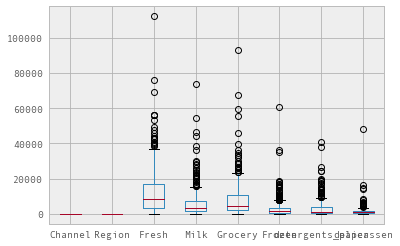

In [69]:
#plot boxplots of complete data
dfWhole.plot.box()

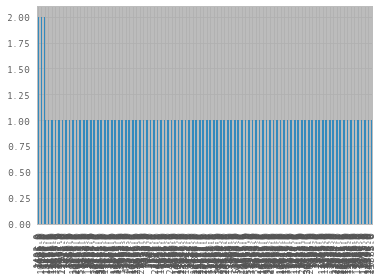

In [92]:
#source on how to plot by column
#https://stackoverflow.com/questions/43549901/visualize-data-from-one-column
dfWhole["Grocery"].value_counts().plot.bar()

In [46]:
#Method 1 - omit the tuples with missing values
#creating a pandas dataframe from csv
dfOmit = pd.DataFrame(columns=['Channel','Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'detergents_paper', 'delicassen'])
i = 0 #current index to insert a new row into df
with open('WholesaleCustomersDataMissing.csv', 'rt') as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        if (("" not in row) & ('Channel' not in row)): #if the row doesn't contain an empty value and is not the first row
            #convert the entries to ints
            rowInt = [ int(x) for x in row ] #convert the entries into integers
            #we have a row that doesn't contain missing values, we can keep it in our data
            dfOmit.loc[i] = rowInt
            i = i + 1

#get descriptive statistics for the df
dfOmit.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,detergents_paper,delicassen
count,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000
mean,1.324885,2.541475,11965.827189,5826.762673,8000.421659,3096.175115,2906.887097,1526.020737
std,0.468872,0.774527,12636.061205,7423.721452,9553.341671,4880.906396,4794.665933,2838.043624
min,1.000000,1.000000,3.000000,55.000000,137.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3141.250000,1531.000000,2155.500000,768.750000,256.250000,405.250000
50%,1.000000,3.000000,8413.500000,3627.000000,4755.500000,1567.000000,820.500000,962.500000
75%,2.000000,3.000000,16905.500000,7234.500000,10699.250000,3564.750000,3992.500000,1811.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


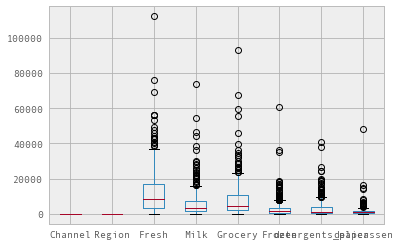

In [71]:
#plot boxplots of data with omits
dfOmit.plot.box()

In [58]:
#Method 2 - fill in missing values with most probable value
dfWhole.mode()
dfWhole.median()

Channel                1.0
Region                 3.0
Fresh               8504.0
Milk                3627.0
Grocery             4755.5
Frozen              1526.0
detergents_paper     816.5
delicassen           965.5
dtype: float64

I interpreted finding the most probable value for each category as finding the mode for each category. Unfortunately, some of the categories have multiple modes that vary greatly. For example, the category 'Fresh' has 7 mode values that range from 3 to 18044.
Instead, we can replace the missing values with the median value from each category. The median is not as susceptible to outliers as the mean is.


In [66]:
#Method 2 - reaplce missing values with the median value
#creating a pandas dataframe from csv
dfReplace = pd.DataFrame(columns=['Channel','Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'detergents_paper', 'delicassen'])
i = 0 #current index to insert a new row into df
#dictionary of median replacement values
medians = {0: 1.0, 1: 3.0, 2:8504.0, 3:3627.0, 4:4755.5, 5:1526, 6:816.5, 7:965.5}
with open('WholesaleCustomersDataMissing.csv', 'rt') as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        if ('Channel' not in row): #if the row doesn't contain an empty value and is not the first row
            if("" in row):
                #row contains missing value, need to replace
                for j in range(0,len(row)):
                    if(row[j] == ""):
                        #we found the empty value
                        row[j] = medians[j]
            rowInt = [ int(x) for x in row ] #convert the entries into integers
        
            dfReplace.loc[i] = rowInt
            i = i + 1

#get descriptive statistics for the df that has replaced values
dfReplace.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,detergents_paper,delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5790.790909,7958.029545,3071.931818,2882.284091,1524.443182
std,0.468052,0.774272,12647.328865,7381.092429,9497.796141,4854.673333,4767.489726,2820.176649
min,1.000000,1.000000,3.000000,55.000000,137.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2156.500000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3623.500000,4755.000000,1526.000000,818.000000,964.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


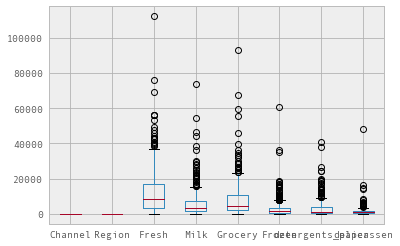

In [72]:
#plot boxplots of data with replaced values
dfReplace.plot.box()